# **핵심만 요약한 통계와 머신러닝 파이썬 코드북 개정1판**
- ⓒ2023 AlgoBoni all rights reserved.
- 본 컨텐츠의 저작권은 알고보니에 있습니다. 저작권법에 의해 보호를 받는 저작물이므로 무단 전재와 무단 복제를 금합니다.
- 본 컨텐츠의 종이책은 [교보문고](https://product.kyobobook.co.kr/detail/S000209591909), [예스24](https://www.yes24.com/Product/Goods/122661688), [알라딘](https://www.aladin.co.kr/shop/wproduct.aspx?ISBN=K262935029&start=pnaver_02)에서 구매할 수 있습니다. 종이책에서는 아래 개념 및 코드에 대한 설명과 연습문제를 제공합니다.

# 10. 비지도 학습 알고리즘

## 10-1. 차원 축소

### - 주성분 분석

In [703]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

feature 13개, data 178개


In [704]:
# PCA 적합
from sklearn.decomposition import PCA
model = PCA(n_components=X.shape[1], svd_solver='auto') #전체 feature 수를 입력
model.fit(scaled_X)

# 고유값 요약
e_value = DataFrame({'고유값':model.explained_variance_, '기여율':model.explained_variance_ratio_}, index=['comp%s'%i for i in range(1,X.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print("고유값 요약:\n", e_value, "\n")

고유값 요약:
              고유값       기여율     누적기여율
comp1   4.732437  0.361988  0.361988
comp2   2.511081  0.192075  0.554063
comp3   1.454242  0.111236  0.665300
comp4   0.924166  0.070690  0.735990
comp5   0.858049  0.065633  0.801623
comp6   0.645282  0.049358  0.850981
comp7   0.554141  0.042387  0.893368
comp8   0.350466  0.026807  0.920175
comp9   0.290512  0.022222  0.942397
comp10  0.252320  0.019300  0.961697
comp11  0.227064  0.017368  0.979066
comp12  0.169724  0.012982  0.992048
comp13  0.103962  0.007952  1.000000 



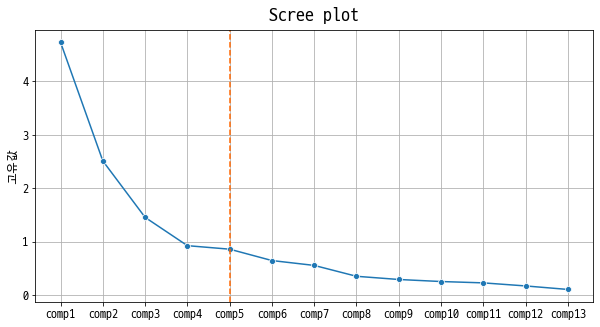

In [705]:
# 고유값 scree plot: elbow 지점의 성분까지 주성분으로 하여 차원 축소할 수 있다.
## comp1~5가 전체 분산의 80%를 설명하고 있으므로 n_components를 5로 하여 fit_transform하고 차원 축소된 데이터를 얻을 수 있다.
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=e_value.index, y='고유값', marker="o", data=e_value, ax=ax)
ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)
for i, v in enumerate(e_value['누적기여율']):
    if v > 0.8:
        ax.axvline(e_value.index[i], ls='--', color='#ff6600')
        best_dim = i+1 # 누적기여율이 처음으로 0.8 이상이 되도록 하는 차원 수
        break
plt.show()

In [706]:
# 차원 축소하여 PCA 적합
model = PCA(n_components=best_dim, svd_solver='auto') # best_dim 입력
model.fit(scaled_X)
PCA_result = model.fit_transform(scaled_X) # 차원 축소 결과

# 고유벡터 요약
e_vector = DataFrame(model.components_, index=['comp%s'%i for i in range(1,best_dim+1)], columns=scaled_X.columns)
print("고유벡터 요약:\n", e_vector.iloc[:, :5], "\n") #5개 feature까지만 조회

고유벡터 요약:
         alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
comp1  0.144329   -0.245188 -0.002051          -0.239320   0.141992
comp2 -0.483652   -0.224931 -0.316069           0.010591  -0.299634
comp3 -0.207383    0.089013  0.626224           0.612080   0.130757
comp4 -0.017856    0.536890 -0.214176           0.060859  -0.351797
comp5 -0.265664    0.035214 -0.143025           0.066103   0.727049 



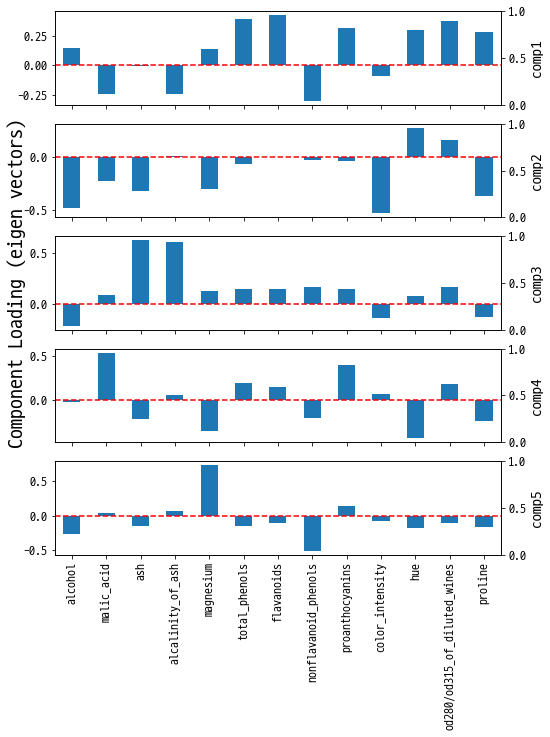

In [707]:
# 고유벡터 plot: feature의 고유벡터값이 클수록 해당 주성분에 영향을 많이 주는 feature임
fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    e_vector.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(e_vector.columns))))
    ax.set_xticklabels([" " for i in range(len(e_vector.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(e_vector.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(e_vector.columns))))
ax.set_xticklabels(list(e_vector.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (eigen vectors)", fontsize=20)
plt.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


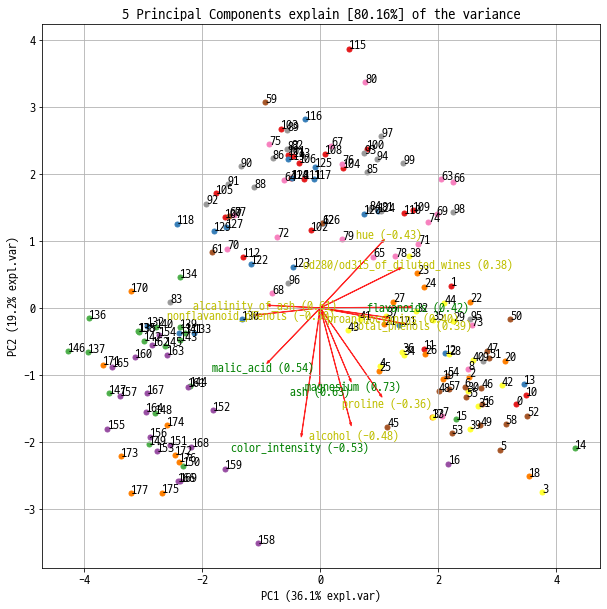

In [708]:
# biplot을 통한 PCA 결과 해석:
#1. 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수이다.
#2. 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 크다.
#3. 각 빨간선이 가까울수록 서로 상관관계가 있다.

from pca import pca
model = pca(n_components=5)
model.fit_transform(scaled_X)
fig, ax = model.biplot(n_feat=scaled_X.shape[1], legend=False, figsize=(10, 10))
plt.show()
plt.close()

### - 요인 분석

In [703]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

feature 13개, data 178개


In [709]:
# FA 적합
from sklearn.decomposition import FactorAnalysis
best_dim = 5 # 잠재변수 5개
model = FactorAnalysis(n_components=best_dim)
model.fit(scaled_X)
FA_result = model.transform(scaled_X)

# 각 잠재요인의 feature별 최대 분산
max_var = DataFrame(model.components_, index=['latent%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("잠재요인 요약:\n", max_var.iloc[:, :5], "\n") #5개 feature까지만 조회

잠재요인 요약:
           alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
latent1  0.299731   -0.424489  0.143386          -0.387691   0.275096
latent2 -0.423886   -0.283977 -0.866066          -0.364116  -0.409356
latent3 -0.576480   -0.039512  0.368996           0.537425  -0.228729
latent4 -0.117865   -0.148264 -0.013634          -0.073661   0.668697
latent5 -0.194167    0.157465 -0.071648           0.239827   0.209583 



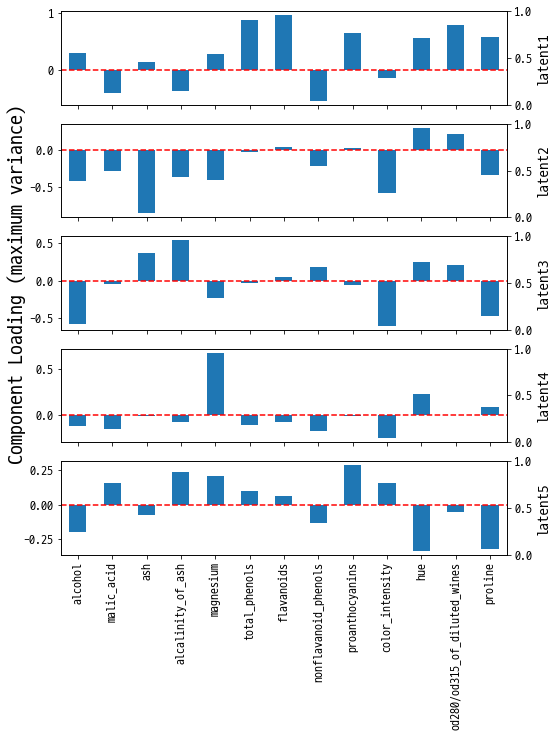

In [710]:
# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    max_var.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(max_var.columns))))
    ax.set_xticklabels([" " for i in range(len(max_var.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(max_var.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(max_var.columns))))
ax.set_xticklabels(list(max_var.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (maximum variance)", fontsize=20)
plt.show()

### - 독립성분 분석

In [703]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

feature 13개, data 178개


In [711]:
# ICA 적합
from sklearn.decomposition import FastICA
best_dim = 5
model = FastICA(n_components=best_dim, algorithm='parallel', whiten=True, fun='logcosh')
model.fit(scaled_X)
ICA_result = model.transform(scaled_X)

# 독립 소스를 얻기 위해 데이터에 적용할 선형 연산자
ind_comp = DataFrame(model.components_, index=['ind comp%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("독립 성분 요약:\n", ind_comp.iloc[:, :5], "\n") #5개 feature까지만 조회

독립 성분 요약:
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
ind comp1  0.026362    0.011572  0.003014          -0.010901   0.007320
ind comp2 -0.008126    0.040546 -0.019026           0.006594  -0.013351
ind comp3 -0.019025   -0.006875 -0.007675           0.002845   0.064266
ind comp4  0.006503   -0.007975 -0.041628          -0.036659  -0.012529
ind comp5 -0.004436    0.009899 -0.000725           0.007822  -0.003259 



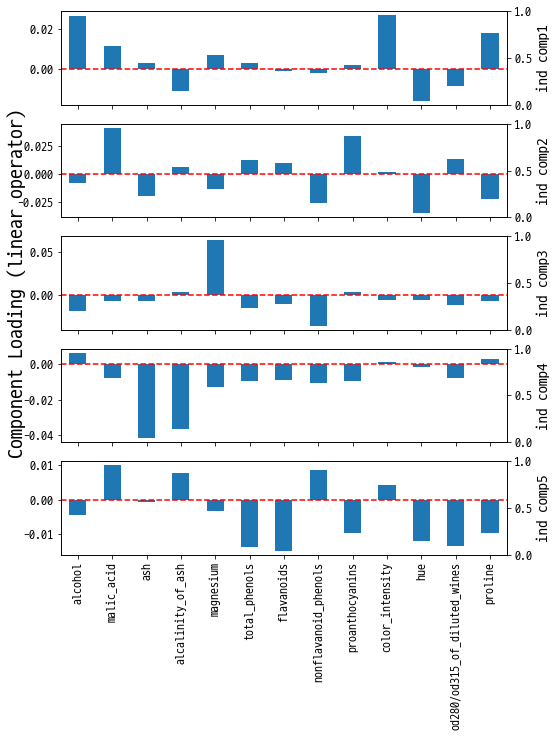

In [712]:
# 각 잠재요인의 feature별 최대 분산 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    ind_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(ind_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(ind_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(ind_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(ind_comp.columns))))
ax.set_xticklabels(list(ind_comp.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (linear operator)", fontsize=20)
plt.show()

### - 음수 미포함 행렬 분해

In [713]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine

load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화 (0~1사이에 데이터가 오도록 MinMaxScaler를 사용)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaled_X = DataFrame(mm.fit_transform(X), columns=X.columns)

feature 13개, data 178개


In [714]:
# NMF 적합
from sklearn.decomposition import NMF
best_dim = 5
model = NMF(n_components=best_dim, init='random', max_iter=2000)
model.fit(scaled_X)
NMF_result = model.transform(scaled_X) # W에 해당

# H에 해당 (Factorization matrix)
NMF_comp = DataFrame(model.components_, index=['NMF comp%s'%i for i in range(1,best_dim+1)], columns=load['feature_names'])
print("NMF 성분 요약:\n", NMF_comp.iloc[:, :5], "\n") #5개 feature까지만 조회

NMF 성분 요약:
             alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
NMF comp1  0.066792    0.000000  0.072881           0.088188   0.000000
NMF comp2  0.374618    0.136223  0.219370           0.234416   0.006538
NMF comp3  0.783110    0.000000  0.400196           0.000000   0.467868
NMF comp4  0.083001    0.000000  0.561783           0.622910   0.216098
NMF comp5  0.353801    1.397176  0.741628           0.869029   0.522353 



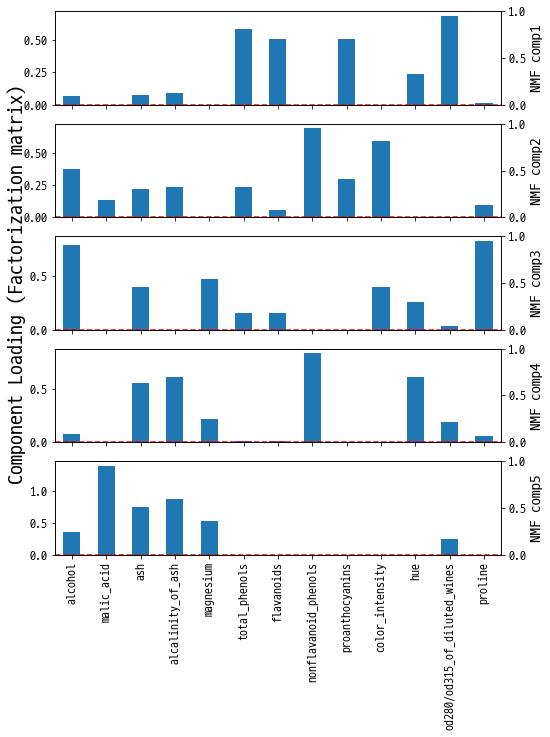

In [715]:
# 각 성분의 feature별 시각화
fig, axes = plt.subplots(best_dim, 1, figsize=(8,10))
for i, ax in enumerate(axes):
    NMF_comp.iloc[i, :].plot.bar(ax=ax, rot=90)
    ax.set_xticks(list(range(len(NMF_comp.columns))))
    ax.set_xticklabels([" " for i in range(len(NMF_comp.columns))])
    twin_ax = ax.twinx()
    twin_ax.set_ylabel(NMF_comp.index[i], fontsize=15)
    ax.axhline(y=0, linestyle='dashed', color='red')
ax.set_xticks(list(range(len(NMF_comp.columns))))
ax.set_xticklabels(list(NMF_comp.columns))
axes[round(best_dim/2)].set_ylabel("Component Loading (Factorization matrix)", fontsize=20)
plt.show()

### - 다차원 척도법

In [726]:
# 데이터 불러오기
from pandas import DataFrame
from sklearn.datasets import load_wine
load = load_wine()
X = DataFrame(load['data'], columns = load['feature_names'])
y = load['target']
print("feature {}개, data {}개".format(X.shape[1], X.shape[0]))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X = DataFrame(ss.fit_transform(X), columns=X.columns)

feature 13개, data 178개


차원 수 2일 때, stress 0.2301572646914574
차원 수 3일 때, stress 0.14421638408180104
차원 수 4일 때, stress 0.10153475198496567
차원 수 5일 때, stress 0.07167081747123694
차원 수 6일 때, stress 0.05262312447954536


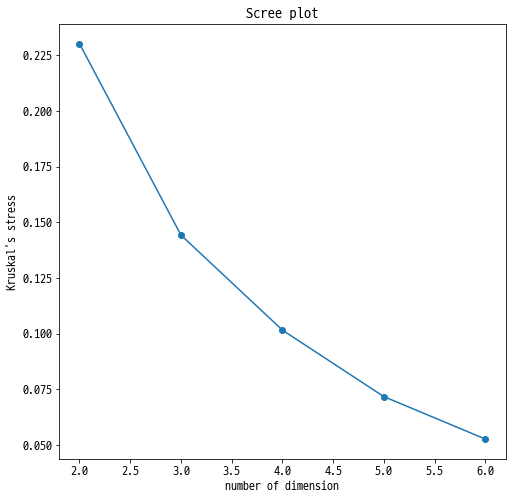

In [843]:
# 데이터 간의 실제 거리 계산하기
from sklearn.metrics import pairwise_distances
distances = pairwise_distances(scaled_X) # metric='euclidean'

# 최적의 차원 수 찾기
Slist = []
from sklearn.manifold import MDS
import numpy as np
for i in range(2,7): 
    mds = MDS(n_components=i, metric=True, random_state=0)
    mds.fit(scaled_X)
    # reduced_d = pairwise_distances(mds.embedding_) # 차원 축소된 데이터 간의 거리
    # distances = mds.dissimilarity_matrix_ 데이터 간 실제 거리
    sklearn_stress = mds.stress_ # ~ 0.5*np.sum((distances-reduced_d)**2)
    kruskal_stress = np.sqrt(sklearn_stress / (0.5 * np.sum(distances**2))) #stress-1
    Slist.append(kruskal_stress)
    print("차원 수 {}일 때, stress {}".format(i, kruskal_stress))

# scree plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plt.title("Scree plot")
plt.plot(list(range(2,7)), Slist, marker='o')
plt.xlabel("number of dimension")
plt.ylabel("Kruskal's stress")
plt.show()

In [846]:
# MDS 적합
best_dim = 5
model = MDS(n_components=best_dim, metric=True)
MDS_result = DataFrame(model.fit_transform(scaled_X)) # model.embedding_과 동일
reduced_d = pairwise_distances(model.embedding_)

print( "raw stress: {:.3f}(~ {:.3f})".format(model.stress_, 0.5*np.sum((distances-reduced_d)**2)) )
print("kruskal stress: {:.3f}(~ {:.3f})".format(
    np.sqrt(model.stress_ / (0.5 * np.sum(distances**2))), 
    np.sqrt(np.sum((distances-reduced_d)**2) / np.sum(distances**2))))

raw stress: 2122.547(~ 2121.945)
kruskal stress: 0.072(~ 0.072)


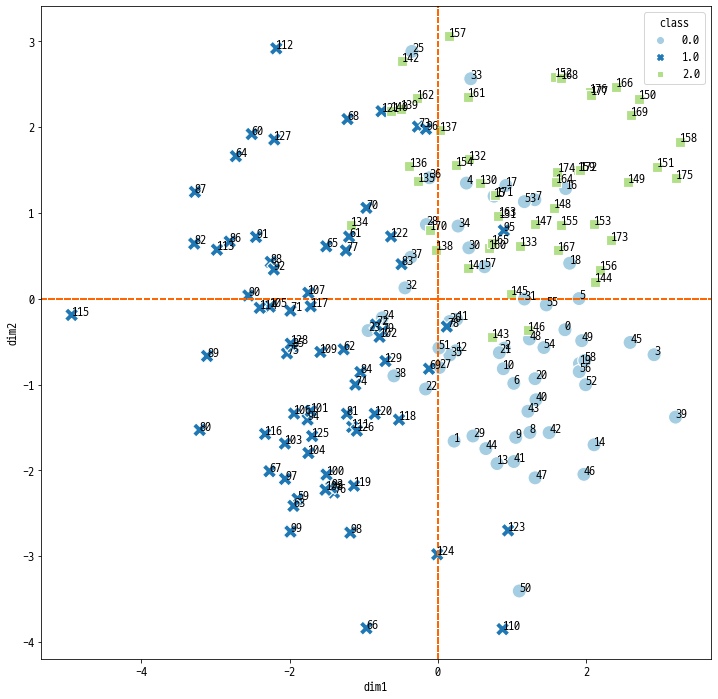

In [847]:
import seaborn as sns
from matplotlib import pyplot as plt
reduced_data = DataFrame(np.c_[MDS_result.values, y], columns=['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'class'])
plt.rcParams['figure.figsize'] = (12, 12)
sns.scatterplot(x='dim1', y='dim2', data=reduced_data, style='class', style_order=[0,1,2], hue='class', palette='Paired', s=200)
for i, name in enumerate(MDS_result.index):
    plt.text( reduced_data.loc[i, 'dim1'], reduced_data.loc[i, 'dim2'], name)
    plt.axhline(0, 0, ls='--', color='#ff6600')
    plt.axvline(0, 0, ls='--', color='#ff6600')
plt.show()

## MDS에 의해 축소된 feature로 그린 산점도로부터 wine 종류 간의 비유사도를 확인할 수 있다.

### - 원본데이터와 차원 축소데이터로 적합한 모델 성능 비교

In [848]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_list = [scaled_X, PCA_result, FA_result, ICA_result, NMF_result, MDS_result]
title_list = ['original', 'PCA', 'FA', 'ICA', 'NMF', 'MDS']
y = load['target']

for X, title in zip(data_list, title_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    lr= LinearRegression().fit(X_train, y_train)
    trainS, testS = lr.score(X_train, y_train), lr.score(X_test, y_test)
    print("{} data: ".format(title))
    print("train score: {:.3f}, test score: {:.3f}\n".format(trainS, testS))

original data: 
train score: 0.890, test score: 0.915

PCA data: 
train score: 0.827, test score: 0.828

FA data: 
train score: 0.877, test score: 0.880

ICA data: 
train score: 0.827, test score: 0.828

NMF data: 
train score: 0.830, test score: 0.846

MDS data: 
train score: 0.800, test score: 0.781



## 10-2. 군집 분석

### 10-2-1. 계층적 군집분석

In [857]:
# 합병형 군집분석
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
# 데이터 불러오기
X = load_iris()['data']
y = load_iris()['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names']))

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

# 군집화 상세내역 매트릭스
Z = linkage(df, method='complete')
print(Z[:3, :].round()) # 일부만 확인
# linkage의 method는 single, complete, average, weighted, centroid, median, ward로 입력할 수 있다. 위의 Z는 4열로 된 matrix인데, 0열과 1열은 인덱스, 2열은 0-1열 인덱스 쌍의 거리, 3열은 클러스터 내 관찰값의 개수를 반환한다. 
# 0, 1열에서 인덱스값이 관찰값 이상으로 296, 297까지 나오는 이유는 그 상위에 병합된 클러스터들이 관찰값에 이어서 새로운 인덱스로 생성되기 때문이다.

[[101. 142.   0.   2.]
 [  7.  39.   0.   2.]
 [ 10.  48.   0.   2.]]


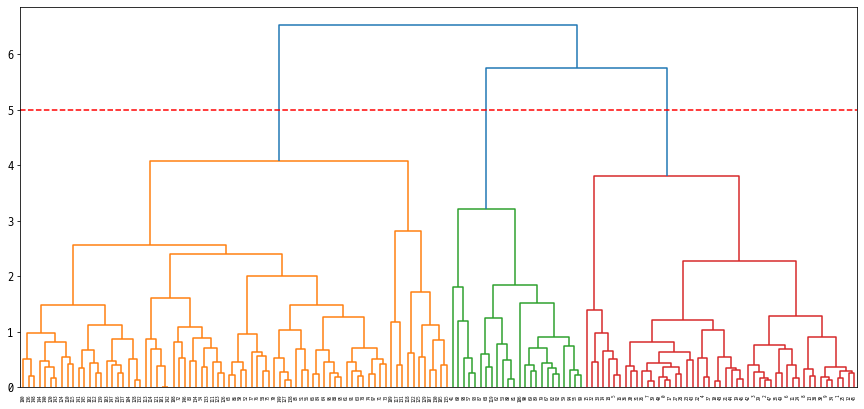

In [852]:
# 군집화 결과 시각화
distance_setting = 5
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
dendrogram(Z, labels=list(df.index), color_threshold=distance_setting) 
# color_threshold 값을 설정하면 해당 거리값을 기준으로 색상이 다른 군집들을 나눠줌
plt.xticks(rotation=90)
ax.axhline(y=distance_setting, linestyle='dashed', color='red')
plt.show()

In [855]:
# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
n_cluster = 3
Hclustering_result = cut_tree(Z, n_cluster).flatten()
print(Hclustering_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [856]:
# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어 있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, Hclustering_result))
print("completeness_score: %.3f" %completeness_score(y, Hclustering_result))

실루엣 계수: 0.450
completeness_score: 0.685


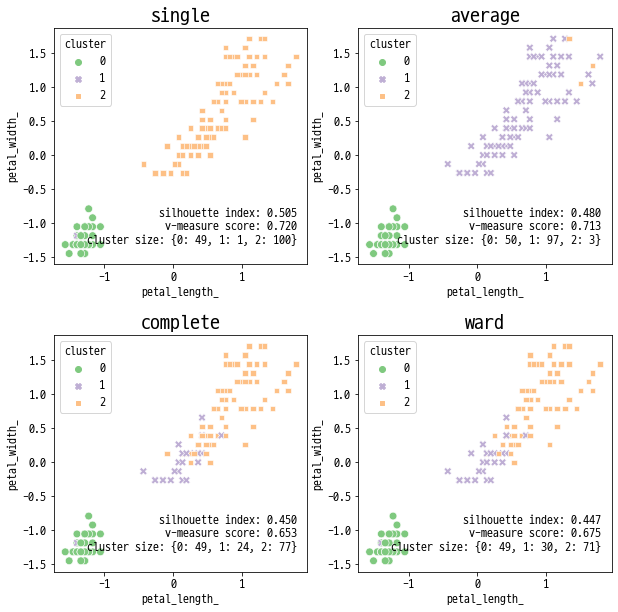

In [ ]:
# 비유사도 측정 지표 별 군집 결과 비교
from pandas import merge
from collections import Counter
import seaborn as sns
from sklearn.metrics import silhouette_score, v_measure_score
fig, axes = plt.subplots(2,2, figsize=(10,10))
plt.rcParams["font.family"] = 'D2Coding'
plt.rcParams["font.size"] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(hspace=0.3)

methods = ['single', 'average', 'complete', 'ward']
for ax, method in zip(axes.ravel(), methods):
    Z = linkage(df, method=method)
    cluster = DataFrame({'cluster': cut_tree(Z,3).flatten()})
    ddf = merge(df, cluster, left_index=True, right_index=True)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=ddf, hue='cluster', style='cluster', s=60, ax=ax, palette='Accent')
    ax.text(1.8, -0.9, "silhouette index: %.3f" %silhouette_score(df, ddf['cluster']), horizontalalignment='right')
    ax.text(1.8, -1.1, "v-measure score: %.3f" %v_measure_score(load_iris()['target'], ddf['cluster']), horizontalalignment='right')
    cluster_size = dict(Counter(ddf['cluster']))
    ax.text(1.8, -1.3, "cluster size: {}".format(cluster_size), horizontalalignment='right')
    ax.set_title(method, fontsize=20)
plt.show()
## 평가 점수 자체는 single이 가장 높게 나왔지만 시각화된 군집 고려했을 때 complete과 ward의 군집화 결과가 타당하게 보인다.

### 10-2-2. 비계층적 군집분석
### - K-means clustering

In [858]:
# K-means clustering
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names'])) 

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

적정한 군집 개수 정하기:


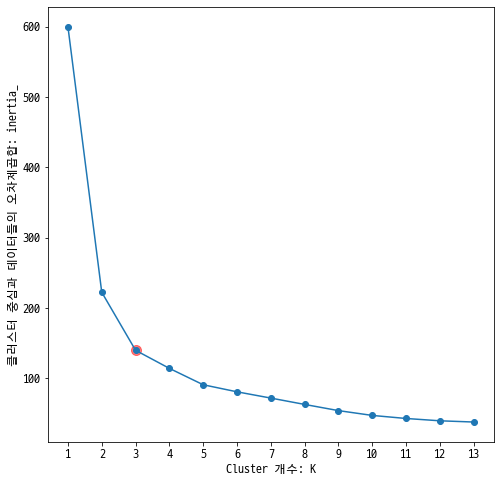

In [860]:
# 적정한 군집 개수 정하기
print("적정한 군집 개수 정하기:")
I = [] # 오차제곱합
for k in range(1,14):
    kmeans=KMeans(n_clusters=k).fit(df)
    I.append(kmeans.inertia_) # 오차제곱합
plt.plot(list(range(1,14)), I, marker="o")

n_cluster = 3
plt.scatter(n_cluster, I[n_cluster-1], color='red', alpha=0.5, s=100)
plt.xticks(list(range(1,14)), list(range(1,14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show()

In [862]:
# n_cluster로 정한 군집의 개수를 기반으로 각 데이터의 군집을 반환
model = KMeans(n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) # 해당 열 데이터의 각 cluster center와의 거리
kmeans_result = model.labels_ # 각 데이터의 군집 반환
print(kmeans_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [864]:
# 군집 정보 확인
print("클러스터 구성: ", Counter(model.labels_))
centers = DataFrame(model.cluster_centers_, columns=df.columns, index=["cluster%s" %i for i in range(n_cluster)])
print("클러스터 중심:\n{}".format(centers))

클러스터 구성:  Counter({0: 53, 1: 50, 2: 47})
클러스터 중심:
          sepal_length_  sepal_width_  petal_length_  petal_width_
cluster0      -0.050220     -0.883376       0.347738      0.281527
cluster1      -1.014579      0.853263      -1.304987     -1.254893
cluster2       1.135970      0.088422       0.996155      1.017526


In [865]:
# 타당성 평가: clustering한 군집번호와 target의 군집번호가 꼭 일치할 필요는 없고, 유사한 데이터들끼리 군집화만 잘 되어 있으면 된다.
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, kmeans_result))
print("completeness_score: %.3f" %completeness_score(y, kmeans_result))

실루엣 계수: 0.460
completeness_score: 0.660


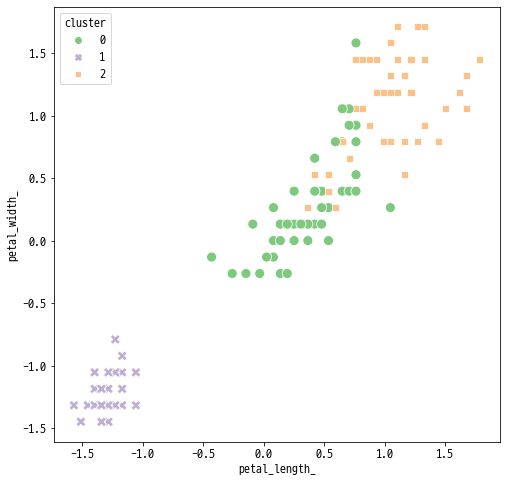

In [867]:
# 군집 결과 시각화
df['cluster'] = kmeans_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### - DBSCAN

In [872]:
# DBSCAN
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names'])) 

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

적정한 eps 정하기:


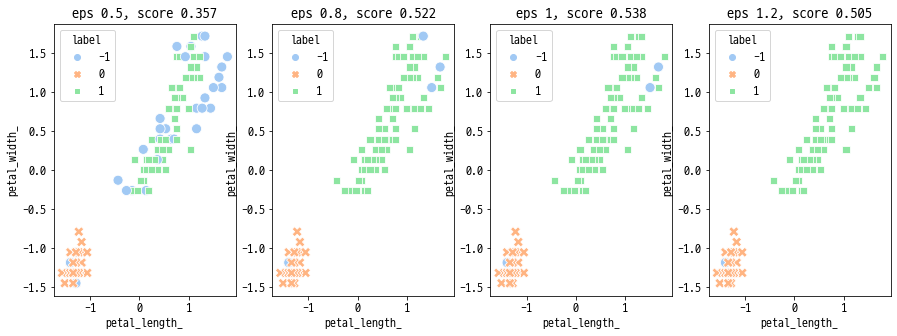

In [873]:
# 적정한 eps 정하기 (min_samples는 10으로 고정함)
# eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함된다. 이는 클러스터를 커지게 하지만 여러 클러스터를 하나로 합치게도 만든다. min_samples는 클러스터의 최소 크기를 결정한다.
print("적정한 eps 정하기:")
eps_list =[0.5, 0.8, 1, 1.2] # eps 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
plt.rcParams['font.size'] = 12
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples = 5).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=100, ax=ax, palette='pastel')
    score = silhouette_score(df, db.labels_)
    ax.set_title("eps {}, score {:.3f}".format(eps, score))
plt.show()

In [874]:
# 확정한 eps를 기반으로 각 데이터의 군집을 반환
eps = 1
model = DBSCAN(eps=eps, min_samples = 10).fit(df)
DB_result = model.labels_ # 각 데이터의 군집 반환
print(DB_result)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [875]:
# 군집 정보 확인
print("클러스터 구성: ", Counter(model.labels_)) # 노이즈 샘플은 -1로 표시됨
print("핵심 데이터 인덱스: ", model.core_sample_indices_)

클러스터 구성:  Counter({1: 97, 0: 49, -1: 4})
핵심 데이터 인덱스:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  86  88  89  90  91  92  94  95  96  97  98
  99 100 101 102 103 104 107 110 111 112 113 114 115 116 120 121 123 124
 125 126 127 128 129 130 132 133 134 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]


In [878]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, DB_result))
print("completeness_score: %.3f" %completeness_score(y, DB_result))

실루엣 계수: 0.582
completeness_score: 0.837


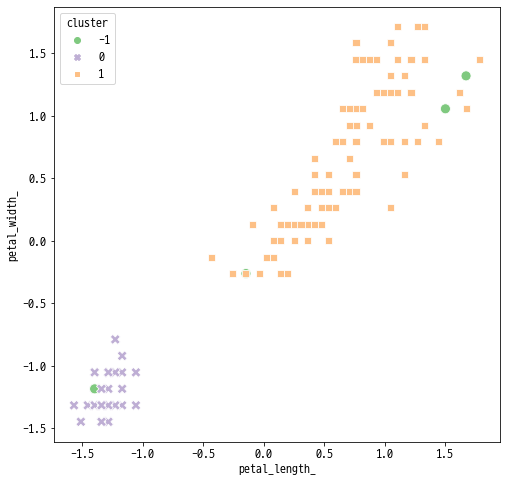

In [879]:
# 군집 결과 시각화
df['cluster'] = DB_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### - 혼합분포군집

In [886]:
# 혼합분포 군집
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names'])) 

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

적정한 분포 개수 정하기:


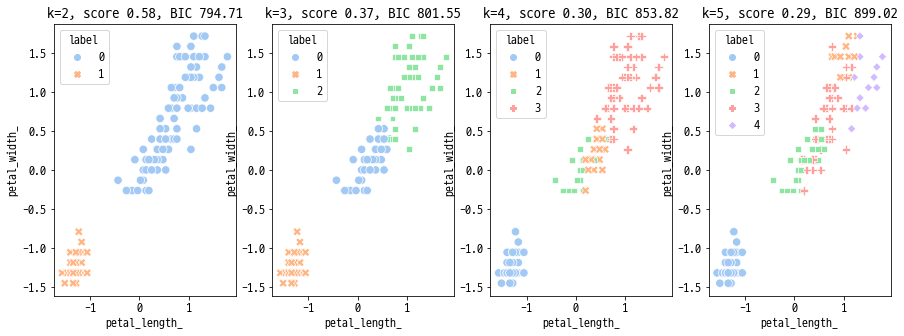

In [887]:
# 적정한 분포 개수 정하기 (=군집 개수 정하기)
print("적정한 분포 개수 정하기:")
dist_list =[2,3,4,5] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(df)
    # covariance_type: {'full', 'tied', 'diag', 'spherical'}
    temp_df = df.copy()
    temp_df['label']= gm.predict(df)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(df), gm.bic(df)
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))
plt.show()

In [888]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
k = 3
model = GaussianMixture(n_components=k).fit(df)
labels = model.predict(df)
GM_result = labels # 각 데이터의 군집 반환
print(GM_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [889]:
# 군집 정보 확인
print("클러스터 구성: ", Counter(labels))
print("distribution 별 feature 평균: \n {}\n {}".format(model.means_[0], model.means_[1]))
print("distribution 별 가중치: ", model.weights_)
print("모델의 로그가능도: {:.3f}".format(model.score(df)))

클러스터 구성:  Counter({2: 55, 1: 50, 0: 45})
distribution 별 feature 평균: 
 [ 0.08890219 -0.64297712  0.25393414  0.13018296]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
distribution 별 가중치:  [0.30095123 0.33333333 0.36571544]
모델의 로그가능도: -1.937


In [890]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))

실루엣 계수: 0.374
completeness_score: 0.901


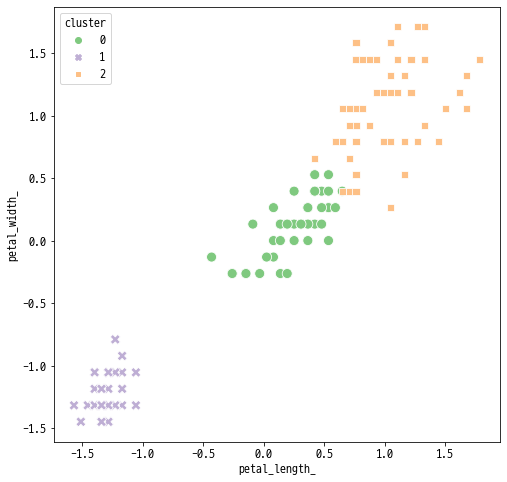

In [891]:
# 군집 결과 시각화
df['cluster'] = GM_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

### - SOM

In [892]:
# SOM
from pandas import DataFrame
import numpy as np
from sklearn.datasets import load_iris
from sklearn_som.som import SOM

# 데이터 불러오기
load = load_iris()
X = load['data']
y = load['target']
columns = list(map(lambda x: x.replace("(cm)", "").replace(" ", "_"), load['feature_names'])) 

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df = DataFrame(ss.fit_transform(X), columns=columns)

적정한 네트워크의 크기 정하기:


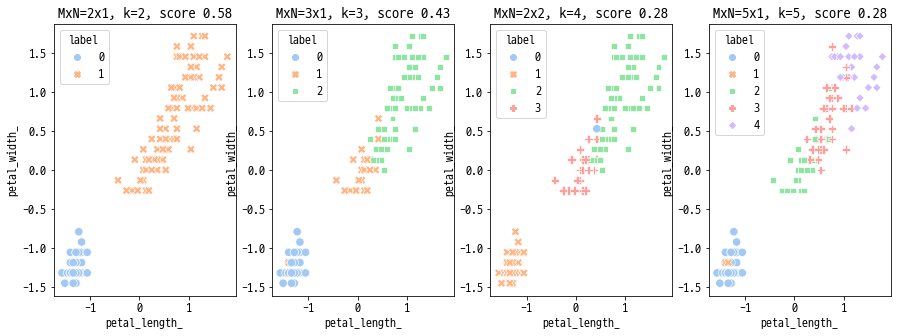

In [893]:
# 적정한 네트워크의 크기 정하기 (=군집 개수 정하기)
print("적정한 네트워크의 크기 정하기:")
mn_list =[(2,1), (3,1), (2,2), (5,1)] # 분포 개수 후보군
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, (M, N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1]) #dim은 입력 데이터의 feature의 개수
    som.fit(df.values) #배열을 입력해야 함 (df형태는 안됨)
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label']= som.predict(df.values)
    sns.scatterplot(x='petal_length_', y='petal_width_', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score = silhouette_score(df, temp_df['label'])
    ax.set_title("MxN={}x{}, k={}, score {:.2f}".format(M,N,clusterNo,score))
plt.show()

In [894]:
# 확정한 k를 기반으로 각 데이터의 군집을 반환
M, N = (3, 1)
model = SOM(m=M, n=N, dim=df.shape[1])
model.fit(df.values)
labels = model.predict(df.values)
som_result = labels # 각 데이터의 군집 반환
print(som_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1
 1 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [895]:
# 군집 정보 확인
SOMmap = model.transform(df.values)
print("클러스터 구성: ", Counter(labels))
print("SOM map: \n", SOMmap[:5]) #앞 5개의 데이터 확인

클러스터 구성:  Counter({2: 65, 0: 50, 1: 35})
SOM map: 
 [[0.6192928  2.43746934 3.72392866]
 [0.89223541 2.28982715 3.6275384 ]
 [0.77179162 2.48584231 3.83880425]
 [0.91705205 2.4653056  3.81835963]
 [0.81669944 2.59447317 3.86465878]] 



In [896]:
# 타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print("실루엣 계수: %.3f" %silhouette_score(df, labels))
print("completeness_score: %.3f" %completeness_score(y, labels))

실루엣 계수: 0.406
completeness_score: 0.774


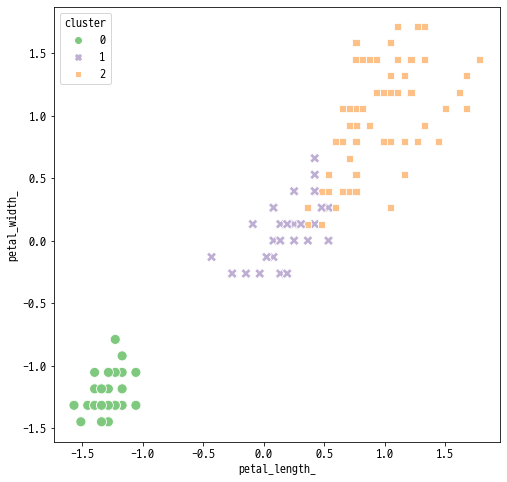

In [897]:
# 군집 결과 시각화
df['cluster'] = som_result
fig, ax = plt.subplots(1,1)
sns.scatterplot(x='petal_length_', y='petal_width_', data=df, hue='cluster', style='cluster', s=100, ax=ax, palette='Accent')
plt.show()

## 10-3. 연관규칙학습

In [898]:
# Transaction data(거래내역 데이터) 생성하기
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = DataFrame(te_ary, columns=te.columns_).applymap(lambda x: 1 if x else 0)
print(df)
## 각 거래품목에 대한 거래 여부를 표시하는 데이터로 전처리 완료

   Apple  Corn  Dill  Eggs  Ice cream  Kidney Beans  Milk  Nutmeg  Onion  \
0      0     0     0     1          0             1     1       1      1   
1      0     0     1     1          0             1     0       1      1   
2      1     0     0     1          0             1     1       0      0   
3      0     1     0     0          0             1     1       0      0   
4      0     1     0     1          1             1     0       0      1   

   Unicorn  Yogurt  
0        0       1  
1        0       1  
2        0       0  
3        1       1  
4        0       0  


In [901]:
# APRIORI 알고리즘으로 연관규칙학습

# 빈발항목집합 생성
from mlxtend.frequent_patterns import apriori
fset = apriori(df, min_support=0.6, use_colnames=True, verbose=0) 
print("빈발항목집합:\n", fset.sort_values(by='support', ascending=False))

빈발항목집합:
     support                     itemsets
1       1.0               (Kidney Beans)
0       0.8                       (Eggs)
5       0.8         (Kidney Beans, Eggs)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
6       0.6                (Onion, Eggs)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Onion, Eggs, Kidney Beans)


In [902]:
# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules
# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric="confidence", min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print("연관규칙:")
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

연관규칙:
             antecedents consequents  antecedent support  consequent support  \
2                (Onion)      (Eggs)                 0.6                 0.8   
3                 (Eggs)     (Onion)                 0.8                 0.6   
8  (Onion, Kidney Beans)      (Eggs)                 0.6                 0.8   
9   (Kidney Beans, Eggs)     (Onion)                 0.8                 0.6   

   support  confidence  lift  leverage  conviction  len_ant  len_con  
2      0.6        1.00  1.25      0.12         inf        1        1  
3      0.6        0.75  1.25      0.12         1.6        1        1  
8      0.6        1.00  1.25      0.12         inf        2        1  
9      0.6        0.75  1.25      0.12         1.6        2        1  


In [903]:
# FP Growth 알고리즘으로 연관규칙학습

# 빈발항목집합 생성
from mlxtend.frequent_patterns import fpgrowth
fset = fpgrowth(df, min_support=0.6, use_colnames=True, verbose=0)
print("빈발항목집합:\n", fset.sort_values(by='support', ascending=False))

빈발항목집합:
     support                     itemsets
0       1.0               (Kidney Beans)
1       0.8                       (Eggs)
5       0.8         (Kidney Beans, Eggs)
2       0.6                     (Yogurt)
3       0.6                      (Onion)
4       0.6                       (Milk)
6       0.6       (Kidney Beans, Yogurt)
7       0.6                (Onion, Eggs)
8       0.6        (Onion, Kidney Beans)
9       0.6  (Onion, Eggs, Kidney Beans)
10      0.6         (Kidney Beans, Milk)


In [904]:
# 연관규칙 생성
from mlxtend.frequent_patterns import association_rules
# metric = {'support', 'confidence', 'lift', 'leverage', 'conviction'}
# min_threshold = metric 파라미터 값의 최솟값 설정
rule = association_rules(fset, metric="confidence", min_threshold=0.7)
rule['len_ant'] = rule['antecedents'].apply(lambda x: len(x))
rule['len_con'] = rule['consequents'].apply(lambda x: len(x))

# consequents 항목이 1이고, lift가 1.2이상인 rule만 확인
print("연관규칙:")
print(rule[(rule['len_con']==1) & (rule['lift']>=1.2)])

## lift 1.25인 규칙들의 경우, Eggs를 사는 사람은 (Kidney Beans, Onion)를 살 확률이 다소 높다는 의미이다.
## leverage 0.12인 규칙들의 경우, 0에 가깝기 때문에 연관이 커 보이지 않는다.
## conviction 값들은 1 이상이기 때문에 어느 정도 C항목의 발생 여부를 예측하는데 유용하다고 볼 수 있다.

연관규칙:
             antecedents consequents  antecedent support  consequent support  \
3                (Onion)      (Eggs)                 0.6                 0.8   
4                 (Eggs)     (Onion)                 0.8                 0.6   
7  (Onion, Kidney Beans)      (Eggs)                 0.6                 0.8   
8   (Kidney Beans, Eggs)     (Onion)                 0.8                 0.6   

   support  confidence  lift  leverage  conviction  len_ant  len_con  
3      0.6        1.00  1.25      0.12         inf        1        1  
4      0.6        0.75  1.25      0.12         1.6        1        1  
7      0.6        1.00  1.25      0.12         inf        2        1  
8      0.6        0.75  1.25      0.12         1.6        2        1  


# 연습문제

### - 1번 문제 풀이

In [1003]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0  C10001    40.900749           0.818182      95.40             0.166667   
1  C10002  3202.467416           0.909091       0.00             0.000000   
2  C10003  2495.148862           1.000000     773.17             1.000000   
3  C10004  1666.670542           0.636364    1499.00             0.083333   
4  C10005   817.714335           1.000000      16.00             0.083333   

   PURCHASES_TRX  
0              2  
1              0  
2             12  
3              1  
4              1  


In [1005]:
# 데이터 전처리: CUST_ID는 범주형 변수로서 각 고객을 식별할 뿐이기 때문에 군집 분석에서는 제외하였다. 그 후, 변수 간 스케일 차이로 인한 왜곡이 일어나지 않도록 표준화를 진행하였다.
df2 = df.drop('CUST_ID', axis=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = DataFrame(ss.fit_transform(df2), columns=df2.columns)
# K-means 클러스터링과 혼합분포 군집 알고리즘으로 각각 군집을 생성하고자 한다.

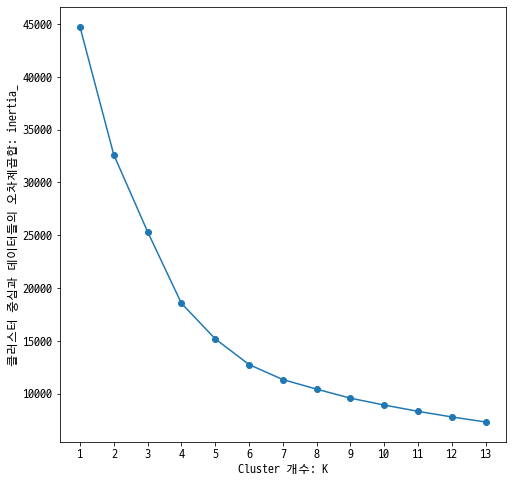

In [1006]:
# K-means는 후보 군집 개수에 따른 오차제곱합들을 살펴, scree plot을 통해 elbow 방법으로 오차제곱합이 평평해지기 시작하는 지점의 군집 개수로 데이터를 군집화하고자 한다. 
from sklearn.cluster import KMeans
from collections import Counter
I = [] # 오차제곱합
for k in range(1,14):
    kmeans=KMeans(n_clusters=k).fit(scaled)
    I.append(kmeans.inertia_) # 오차제곱합
plt.plot(list(range(1,14)), I, marker="o")
plt.xticks(list(range(1,14)), list(range(1,14)))
plt.xlabel("Cluster 개수: K")
plt.ylabel("클러스터 중심과 데이터들의 오차제곱합: inertia_")
plt.show()
# 팔꿈치 지점으로 보이는 4를 군집의 개수로 정하기로 한다.

In [1013]:
# n_cluster=4로 군집화
Kmodel = KMeans(n_clusters=4, random_state=0)
Kmodel.fit(scaled) # 해당 열 데이터의 각 cluster center와의 거리
kmeans_result = Kmodel.labels_ # 각 데이터의 군집 반환
print(Counter(kmeans_result))

# 타당성 평가
from sklearn.metrics import silhouette_score
print("실루엣 계수: %.3f" %silhouette_score(scaled, kmeans_result))

Counter({2: 3604, 0: 3478, 1: 1485, 3: 383})
실루엣 계수: 0.422


적정한 분포 개수 정하기:


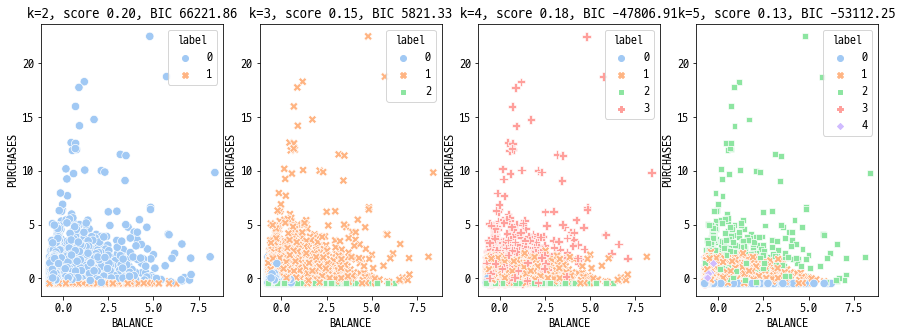

In [995]:
# 혼합분포군집 방법으로는 분포 개수 후보군으로 적합한 각각의 결과를 실루엣 계수와 BIC로 비교하고 가장 타당한 분포 개수를 정하고자 한다.
dist_list =[2,3,4,5]
fig, axes = plt.subplots(1,4, figsize = (15,5))
for ax, k in zip(axes, dist_list):
    gm = GaussianMixture(n_components=k, covariance_type='full').fit(scaled)
    temp_df = scaled.copy()
    temp_df['label']= gm.predict(scaled)
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    aic, bic = gm.aic(scaled), gm.bic(scaled)
    score = silhouette_score(scaled, temp_df['label'])
    ax.set_title("k={}, score {:.2f}, BIC {:.2f}".format(k, score, bic))
plt.show()
# 비교적 실루엣 스코어가 높고, BIC가 낮은 것으로 보이는 분포 개수 4개로 정하기로 한다.

In [1014]:
# n_components=4로 군집화
Gmodel = GaussianMixture(n_components=4)
Gmodel.fit(scaled)
GM_result = Gmodel.predict(scaled)
print(Counter(GM_result))

# 타당성 평가
from sklearn.metrics import silhouette_score
print("실루엣 계수: %.3f" %silhouette_score(scaled, GM_result))

Counter({0: 4496, 2: 2040, 3: 1426, 1: 988})
실루엣 계수: 0.175


### - 2번 문제 풀이

In [ ]:
# 두 분포 모두 각 군집 별 데이터의 개수는 고르게 배치된 것으로 보이지만, 실루엣 계수로 미루어볼 때 군집 내의 응집도와 군집 간 분리도가 더 높은 K-means(0.422)의 결과가 혼합분포군집(0.175)의 결과보다 더 타당한 것으로 보인다. 이에 K-means 모델을 선택하고자 한다.

### - 3번 문제 풀이

In [1052]:
df['cluster'] = kmeans_result
print(df[df['cluster']==0].describe().round(2).iloc[:, :-1])
# 군집0은 3478개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 2397에, 계좌 업데이트 빈도지수 평균이 0.98이며, 구매액 평균이 230.47이고, 구매 빈도지수 평균은 0.13이고, 거래 건수 평균은 2.38의 특성을 보인다.
# 해당 군집은 구매계좌 잔액과 계좌 업데이트 빈도지수는 높은 편이지만, 실제 구매는 많이 이루어지지 않는 군집이다. '잠재 구매력 고객'으로 정의할 수 있다.

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3478.00            3478.00    3478.00              3478.00   
mean    2397.40               0.98     230.47                 0.13   
std     2281.64               0.06     465.86                 0.18   
min        0.49               0.55       0.00                 0.00   
25%      924.57               1.00       0.00                 0.00   
50%     1603.21               1.00       0.52                 0.08   
75%     3098.06               1.00     255.61                 0.25   
max    16304.89               1.00    4900.00                 1.00   

       PURCHASES_TRX  
count        3478.00  
mean            2.38  
std             3.85  
min             0.00  
25%             0.00  
50%             1.00  
75%             4.00  
max            34.00  


In [1049]:
print(df[df['cluster']==1].describe().round(2).iloc[:, :-1])
# 군집1은 1485개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 155.46에, 계좌 업데이트 빈도지수 평균이 0.40이며, 구매액 평균이 353.70이고, 구매 빈도지수 평균은 0.28이고, 거래 건수 평균은 4.45의 특성을 보인다.
# 해당 군집은 구매계좌 잔액과 계좌 업데이트 빈도가 낮고, 구매액과 구매빈도도 낮은 '낮은 구매력 고객'으로 정의할 수 있다.

       BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count  1485.00            1485.00    1485.00              1485.00   
mean    155.46               0.40     353.70                 0.28   
std     333.71               0.20     529.36                 0.27   
min       0.00               0.00       0.00                 0.00   
25%       7.58               0.27      33.38                 0.08   
50%      29.47               0.45     161.50                 0.18   
75%     131.34               0.55     442.03                 0.42   
max    3947.75               0.75    5252.04                 1.00   

       PURCHASES_TRX  
count        1485.00  
mean            4.45  
std             5.22  
min             0.00  
25%             1.00  
50%             3.00  
75%             6.00  
max            41.00  


In [1050]:
print(df[df['cluster']==2].describe().round(2).iloc[:, :-1])
# 군집2는 3604개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 1084.17에, 계좌 업데이트 빈도지수 평균이 0.97이며, 구매액 평균이 1316.54이고, 구매 빈도지수 평균은 0.87이고, 거래 건수 평균은 21.97의 특성을 보인다.
# 전체 고객의 40%가 군집 2에 해당할 만큼 일반적인 군집 특성을 가진다. 구매계좌 잔액과 구매액은 일반적이지만 계좌 업데이트 빈도는 매우 높고, 구매 빈도지수도 높은 편이며, 거래 건수도 높은 편에 속한다. "높은 구매력 고객"으로 정의할 수 있다.

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count   3604.00            3604.00    3604.00              3604.00   
mean    1084.17               0.97    1316.54                 0.87   
std     1450.10               0.08    1166.23                 0.16   
min        0.73               0.45       8.40                 0.25   
25%      111.73               1.00     462.96                 0.75   
50%      483.33               1.00     938.08                 0.92   
75%     1464.57               1.00    1840.17                 1.00   
max    11734.27               1.00    8591.31                 1.00   

       PURCHASES_TRX  
count        3604.00  
mean           21.97  
std            14.68  
min             0.00  
25%            12.00  
50%            17.00  
75%            28.00  
max            98.00  


In [1051]:
print(df[df['cluster']==3].describe().round(2).iloc[:, :-1])
# 군집3은 383개의 고객이 해당되는 군집으로서 구매계좌 잔액 평균 3983.54에, 계좌 업데이트 빈도지수 평균이 0.99이며, 구매액 평균이 7590.20이고, 구매 빈도지수 평균은 0.96이고, 거래 건수 평균은 98.16의 특성을 보인다.
# 군집3은 4개의 군집 중에서 고객수는 가장 적지만, 구매계좌 사용, 구매액, 구매빈도, 거래건수가 가장 높고 활발한 '슈퍼 구매력 고객'이라고 정의할 수 있다.

        BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
count    383.00             383.00     383.00               383.00   
mean    3983.54               0.99    7590.20                 0.96   
std     3431.34               0.05    6288.93                 0.13   
min      137.64               0.27     885.44                 0.17   
25%     1216.19               1.00    4121.02                 1.00   
50%     2986.42               1.00    5779.36                 1.00   
75%     5768.60               1.00    8731.10                 1.00   
max    19043.14               1.00   49039.57                 1.00   

       PURCHASES_TRX  
count         383.00  
mean           98.16  
std            54.14  
min             3.00  
25%            67.50  
50%            87.00  
75%           114.00  
max           358.00  


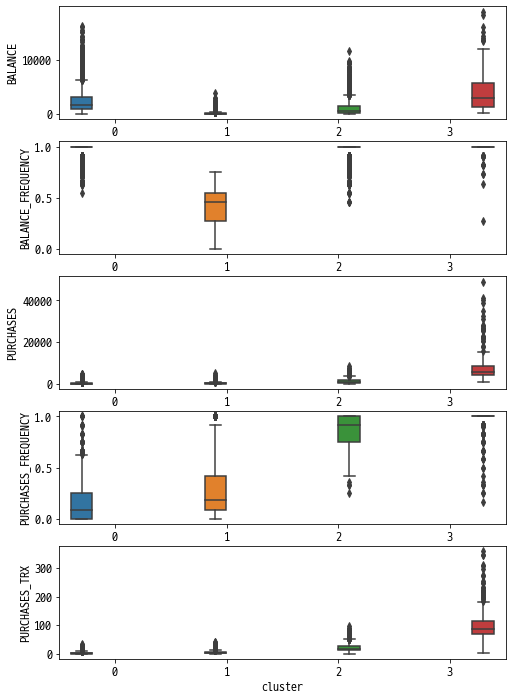

In [1043]:
# 특성 별 각 군집의 데이터 분포는 아래와 같이 시각화 할 수 있다.
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,12)
plt.rcParams['font.family'] = 'D2Coding'
fig, axes = plt.subplots(5,1)
for ax, col in zip(axes, ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'PURCHASES_FREQUENCY', 'PURCHASES_TRX']):
    sns.boxplot(x='cluster', y=col, hue='cluster', data=df, ax=ax)
    ax.legend().remove()
plt.show()

### - 4번 문제 풀이

In [1032]:
# 주어진 데이터를 앞서 표준화한 기준으로 정규화하고, 적합한 군집 모델로 예측한 결과 군집 3이 나왔다.
Kmodel.predict(ss.transform([[3000, 1, 6000, 1, 100]]))

array([3], dtype=int32)

### - 5번 문제 풀이

In [ ]:
# 여러 군집들 중에서도 군집 0을 메인 타겟으로 한 마케팅 전략을 제안한다. 군집 0에 해당하는 고객들은 전체의 39%를 차지하여 규모가 클 뿐만 아니라, 구매계좌 잔액, 계좌 업데이트 빈도 지수를 미루어보아 구매력이 높은 집단으로 판단되기 때문이다. 다만, 현재 해당 군집의 구매액, 구매 빈도, 거래 건수가 낮은 이유는 해당 군집들이 필요로하는 제품의 라인업이 부족하거나 구매 과정 상의 동선, 프로모션 부족 등의 문제가 있을 것으로 예상한다. 이러한 문제점을 파악하여 제품 라인업을 보충하고, 구매 과정 상의 동선을 확인하거나 해당 군집을 대상으로 한 프로모션을 기획하기를 제안한다.